In [45]:
# 使用 KMeans 聚类消费行为特征数据
import numpy as np
import pandas as pd
inputFile = './chapter5/demo/data/consumption_data.xls'
k = 3  # 聚类数
threshold = 2  # 离散点阈值
iteration = 500  # 聚类最大迭代次数
data = pd.read_excel(inputFile, index_col='Id')
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [46]:
data_zs = 1.0 * (data - data.mean()) / data.std()  # 数据标准化（零-均值规范化）
data_zs.head()

,R,F,M
Id,,,
1,0.764186,-0.493579,-1.158711
2,-1.024757,-0.630079,0.622527
3,-0.950217,0.871423,-0.341103
4,-1.024757,0.188922,-1.158432
5,-0.204824,-0.357079,1.189868


In [47]:
# KMeans 聚类
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, n_jobs=2, max_iter=iteration)  # 建立模型
model.fit(data_zs)  # 训练模型
model.labels_  # 查看聚类结果

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,

In [ ]:
# 标准化数据及其类别（书上的写法）
# r = pd.concat([data_zs, pd.Series(model.labels_, index=data.index)], axis='columns')  # 添加类别属性
# r.columns = list(data.columns) + ['类别']  # 重命名表头

In [48]:
# 标准化数据及其类别
r = data_zs.copy()
r['类别'] = model.labels_
r.head()

,R,F,M,类别
Id,,,,
1,0.764186,-0.493579,-1.158711,0
2,-1.024757,-0.630079,0.622527,0
3,-0.950217,0.871423,-0.341103,2
4,-1.024757,0.188922,-1.158432,0
5,-0.204824,-0.357079,1.189868,0


In [49]:
norm = []
for i in range(k):
    norm_tmp = r.loc[r['类别']==i, ['R', 'F', 'M']] - model.cluster_centers_[i]  # 计算到中心点距离
    norm_tmp = norm_tmp.apply(np.linalg.norm)  # 求出绝对距离
    norm.append(norm_tmp / norm_tmp.median())  # 求相对距离，并添加
norm

[R    1.000000
 F    0.706442
 M    1.284830
 dtype: float64, R    1.000000
 F    0.610452
 M    1.096994
 dtype: float64, R    1.000000
 F    0.945727
 M    1.617376
 dtype: float64]

In [50]:
norm = pd.concat(norm)  # 合并
norm

R    1.000000
F    0.706442
M    1.284830
R    1.000000
F    0.610452
M    1.096994
R    1.000000
F    0.945727
M    1.617376
dtype: float64

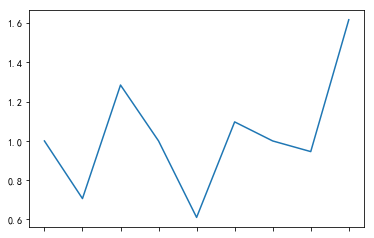

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
norm[norm <= threshold].plot()  # 正常点

In [57]:
discrete_point = norm[norm > threshold].plot()  # 离群点

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
model.cluster_centers_  # 中心点坐标

In [ ]:
a = r.loc[r['类别']==1, ['R', 'F', 'M']] - model.cluster_centers_[1]  # 计算中心点距离
a.head()

In [ ]:
a = a.apply(np.linalg.norm)
a.head()

In [61]:
? norm.plot()